## PROJEKTNA NALOGA - Rezultati tehničnih pregledov motornih vozil 

**`Nejc Frank , Matija Tomažič, Gašper Perovič`**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
podatki = pd.read_csv("Porocilo_o_uspesnosti_TP_1.csv", delimiter=";", low_memory=False)
podatki

podatki["DATUM_PRVE_REGISTRACIJE"] = pd.to_datetime(podatki["DATUM_PRVE_REGISTRACIJE"], infer_datetime_format=True)
podatki["DATUM_PRVE_REGISTRACIJE_SLO"] = pd.to_datetime(podatki["DATUM_PRVE_REGISTRACIJE_SLO"], infer_datetime_format=True)
podatki["DATUM_PREGLEDA"] = pd.to_datetime(podatki["DATUM_PREGLEDA"], infer_datetime_format=True)


podatki["ZNAMKA"] = podatki["ZNAMKA"].replace(['MERCEDES BENZ'], 'MERCEDES-BENZ')
podatki["ZNAMKA"] = podatki["ZNAMKA"].replace(['VOLKSWAGEN, VW'], 'VOLKSWAGEN')

**1. Poizvedba, prikaže število motornih vozil glede na vrsto vozila, izpisano z stolpičnim diagramom**

In [5]:
znamka = podatki[['KATEGORIJA_OPIS']]
znamka = podatki.groupby('KATEGORIJA_OPIS')['ZNAMKA'].count()
znamka1 = znamka.to_dict()
znamka1 = sorted(znamka1.items(), reverse=True ,key=operator.itemgetter(1));
znamka2 = {}
for k, v in znamka1:
    znamka2[k] = v

znamka1 = znamka2
znamka1.pop('osebni avtomobil')

169971

In [6]:
k = list()

for key in znamka1:
    k.append(str(key) + " (" + str(znamka1[key]) + ")" )

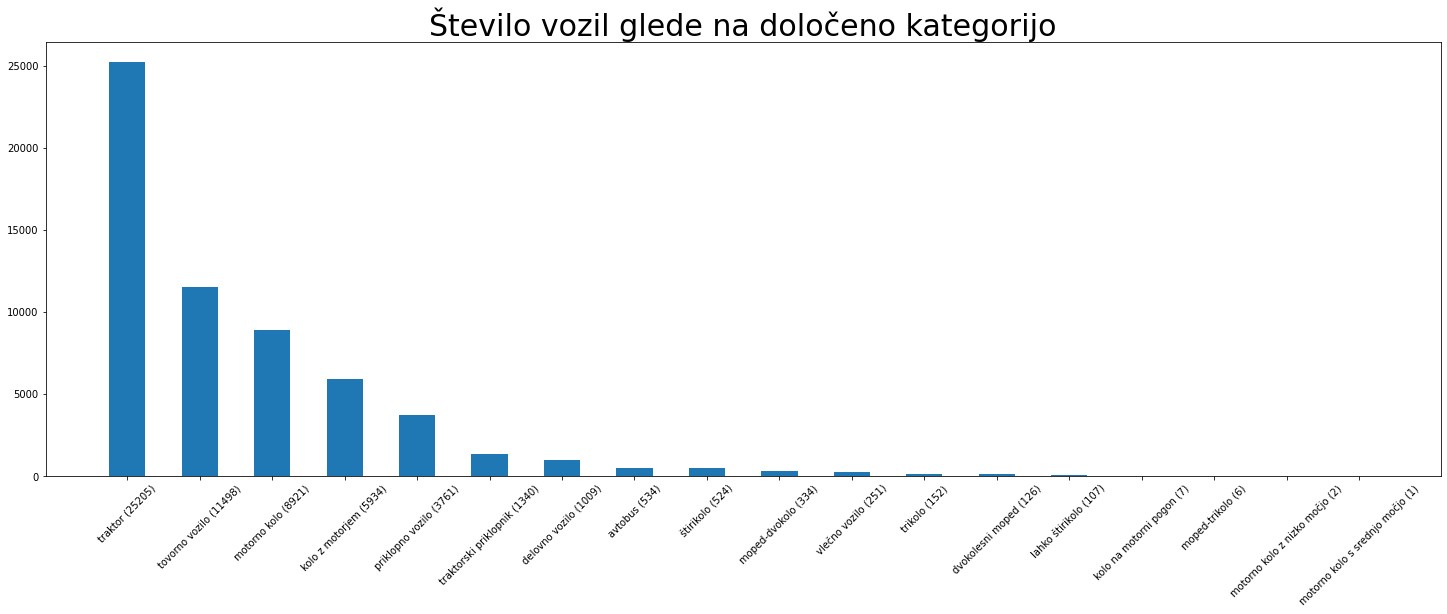

In [7]:

fig = plt.figure(figsize=(25,8))
plt.bar(k,(znamka1.values()), width=0.5)
plt.xticks(rotation=45)
plt.title("Število vozil glede na določeno kategorijo", size="30")
plt.show()

**2. Dobljen rezultat prikazuje 10 izvajalnih enot, pri katerih je bilo največ vozil brezhibnih**

In [6]:
narejeno1 = podatki['TEHNICNI_PREGLED_STATUS'].tolist()
narejeno2 = podatki['IZVAJALNA_ENOTA_OPIS'].tolist()

narejeno = podatki[podatki["TEHNICNI_PREGLED_STATUS"] == "brezhiben"].groupby("IZVAJALNA_ENOTA_OPIS")["IZVAJALNA_ENOTA_OPIS"].count()
narejeno1 = podatki.groupby("IZVAJALNA_ENOTA_OPIS")["IZVAJALNA_ENOTA_OPIS"].count()
narejeno = narejeno.to_dict()

for k in narejeno:
    narejeno[k] = narejeno[k] / narejeno1[k] *100


In [7]:
dict = {'Name':narejeno.keys(), 'value':(narejeno.values())}
df = pd.DataFrame(dict)
df.nlargest(10,"value")


,Name,value
7,A1 D.D. MOSTE,100.000000
70,"AVTO KRKA D.O.O., PE AVTOCENTER IDRIJA",100.000000
92,"AVTO KRKA TP d.o.o., PE LJUBLJANA III",100.000000
192,MPI d.o.o. Idrija PP Postojna,100.000000
108,AVTOPLUS D.D. KOPER PE POSTOJNA,98.924731
101,AVTOCENTER ORMOŽ D.O.O.,94.688347
202,POMURSKI AVTOCENTER D.O.O.,94.672532
25,ALPETOUR D.D. ŠKOFJA LOKA,93.589744
295,VIATOR&VEKTOR Logistika d.o.o.,92.462312
65,"AVTO CENTER ANDREJEK, PE Veščica",91.150442


**3. Povprečno število prevoženih km ko vozilo ne opravi tehničnega pregleda, 5 najbolj popularnih znamk.**

In [8]:
podatkiOsebnaVozila = podatki[podatki["KATEGORIJA_OPIS"] == "osebni avtomobil"]
countZnamkeOsebnihVozil = podatkiOsebnaVozila.groupby("ZNAMKA")["ZNAMKA"].count()
countZnamkeOsebnihVozil.nlargest(5)

ZNAMKA
RENAULT       30542
VOLKSWAGEN    25250
OPEL          13021
CITROEN       12148
PEUGEOT       11483
Name: ZNAMKA, dtype: int64

In [9]:
prevozeniKM = podatki[podatki["KATEGORIJA_OPIS"] == "osebni avtomobil"]
prevozeniKM = prevozeniKM[prevozeniKM["TEHNICNI_PREGLED_STATUS"] != "brezhiben"]
prevozeniKM = prevozeniKM.groupby("ZNAMKA")["PREVOZENI_KILOMETRI"].mean()

test = prevozeniKM[["RENAULT","VOLKSWAGEN", "OPEL", "CITROEN", "PEUGEOT"]]
test

ZNAMKA
RENAULT       190213.985576
VOLKSWAGEN    260323.919736
OPEL          195921.192794
CITROEN       204778.718830
PEUGEOT       191290.674769
Name: PREVOZENI_KILOMETRI, dtype: float64